In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('fuel_econ.csv')
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


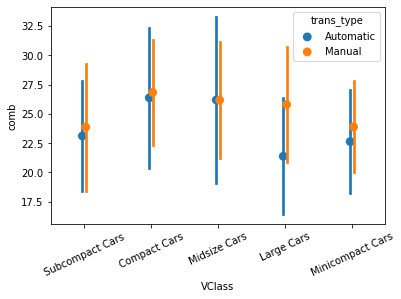

In [7]:
sns.pointplot(data=df, x='VClass', y='comb', hue='trans_type', ci='sd',
             linestyles="", dodge=True)
plt.xticks(rotation=25);

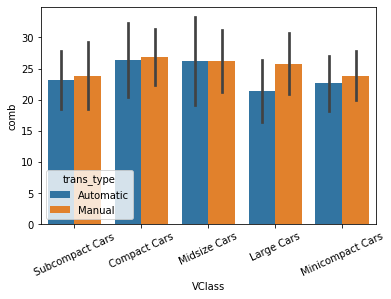

In [13]:
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type', ci='sd')
plt.xticks(rotation=25);

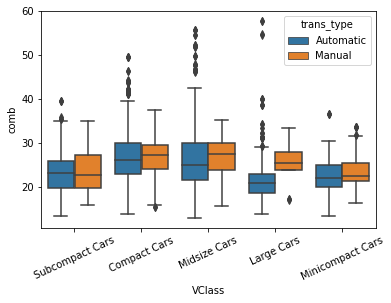

In [16]:
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=25);

In [23]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

displ_bins = pd.cut(df['displ'], bins_x, right=False, include_lowest=True, labels=False).astype(int)
comb_bins = pd.cut(df['comb'], bins_y, right=False, include_lowest=True, labels=False).astype(int)
n_points = df.groupby([displ_bins, comb_bins]).size()
#n_points.reset_index()
#n_points.reset_index().pivot(index='displ', columns='comb')
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values
co2weights = df['co2'] / n_points[displ_bins, comb_bins]

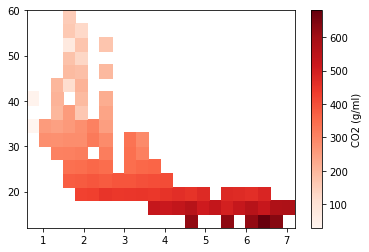

In [27]:

plt.hist2d(data=df, x='displ', y='comb', cmin=0.5, cmap='Reds', bins=[bins_x, bins_y], weights=co2weights)
plt.colorbar(label='CO2 (g/ml)');